In [2]:
from pyspark.sql import SparkSession
 
from pyspark.sql.functions import *
from pyspark.sql.types import *
spark = SparkSession.builder.appName('Google Playstore').getOrCreate()
 

df = spark.read.csv('googleplaystore.csv', header=True, inferSchema=True)
 

df.show(5)

+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+----------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|    Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+----------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design| January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|  August 1, 2018|             1.2.4|4.0.3 and up|
|Ske

In [85]:
top_apps = df.groupBy("App") \
    .agg({"Reviews": "sum"}) \
    .withColumnRenamed("sum(Reviews)", "Total_Reviews") \
    .orderBy(col("Total_Reviews").desc()) \
    .limit(10)

In [86]:
top_apps.show()

+--------------------+-------------+
|                 App|Total_Reviews|
+--------------------+-------------+
|           Instagram| 2.66241989E8|
|  WhatsApp Messenger| 2.07348304E8|
|      Clash of Clans| 1.79558781E8|
|Messenger – Text ...| 1.69932272E8|
|      Subway Surfers| 1.66331958E8|
|    Candy Crush Saga| 1.56993136E8|
|            Facebook| 1.56286514E8|
|         8 Ball Pool|  9.9386198E7|
|        Clash Royale|  9.2530298E7|
|            Snapchat|   6.804501E7|
+--------------------+-------------+



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------- ------------------------- 2.9/7.8 MB 15.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 14.3 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.8 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\S564560\AppData\Local\Temp\ipykernel_10052\785533702.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Reviews', y='App', data=top_apps_pd, palette='viridis')


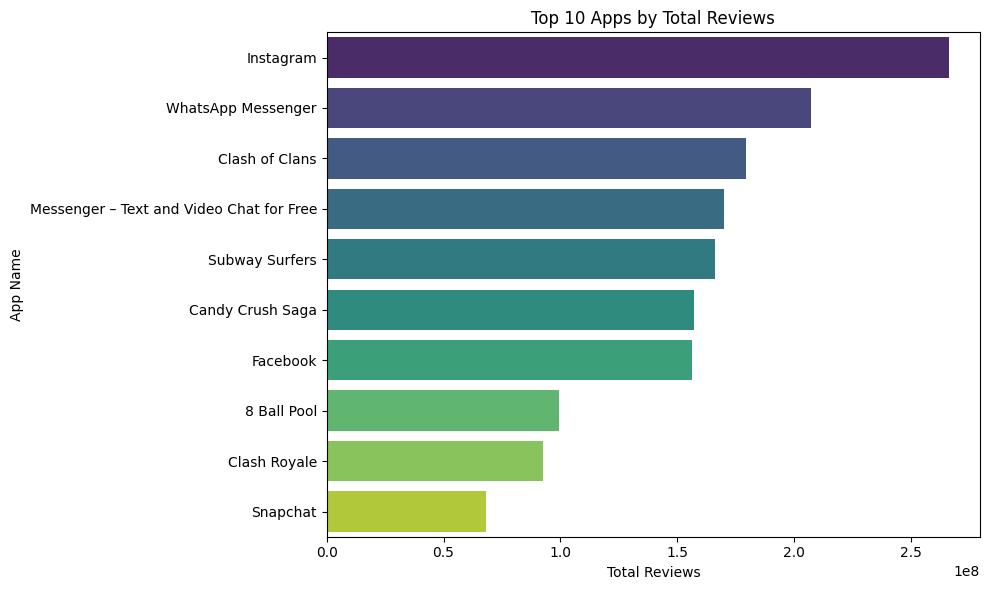

In [105]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting the PySpark DataFrame to a Pandas DataFrame for visualization
top_apps_pd = top_apps.toPandas()

# Create a bar plot of the top apps by total reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Reviews', y='App', data=top_apps_pd, palette='viridis')

# Set plot labels and title
plt.xlabel('Total Reviews')
plt.ylabel('App Name')
plt.title('Top 10 Apps by Total Reviews')

# Show the plot
plt.tight_layout()
plt.show()

In [108]:
# Remove non-numeric characters and convert 'Installs' to integer
df = df.withColumn("Installs", regexp_replace(col("Installs"), "[^0-9]", "").cast("int"))

# Group by 'App' and 'Type', calculate sum of installs, and order by descending installs
result = df.groupBy("App", "Type") \
    .agg({"Installs": "sum"}) \
    .withColumnRenamed("sum(Installs)", "Total_Installs") \
    .orderBy(col("Total_Installs").desc()) \
    .limit(10)

# Show the results
result.show()


+------------------+----+--------------+
|               App|Type|Total_Installs|
+------------------+----+--------------+
|    Subway Surfers|Free|    6000000000|
|         Instagram|Free|    4000000000|
|      Google Drive|Free|    4000000000|
|          Hangouts|Free|    4000000000|
|     Google Photos|Free|    4000000000|
|       Google News|Free|    4000000000|
|  Candy Crush Saga|Free|    3500000000|
|WhatsApp Messenger|Free|    3000000000|
|             Gmail|Free|    3000000000|
|      Temple Run 2|Free|    3000000000|
+------------------+----+--------------+



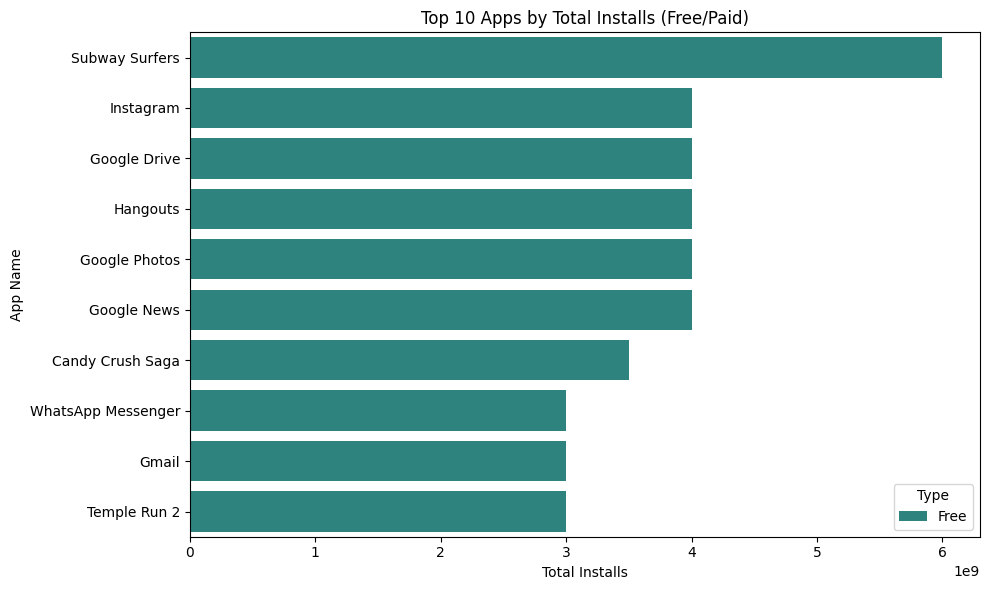

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting the PySpark DataFrame to a Pandas DataFrame for visualization
result_pd = result.toPandas()

# Create a bar plot of the top 10 apps by total installs, segmented by Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Installs', y='App', hue='Type', data=result_pd, palette='viridis')

# Set plot labels and title
plt.xlabel('Total Installs')
plt.ylabel('App Name')
plt.title('Top 10 Apps by Total Installs (Free/Paid)')

# Show the plot
plt.tight_layout()
plt.show()




In [133]:
# Remove non-numeric characters and convert 'Installs' to integer
df = df.withColumn("Installs", regexp_replace(col("Installs"), "[^0-9]", "").cast("int"))
# Group by 'Category' and calculate the total installs for each category
category_distribution = df.groupBy("Category") \
    .agg(sum("Installs").alias("Total_Installs")) \
    .orderBy(col("Total_Installs").desc())\
.limit(10)

# Show the results
category_distribution.show()

+------------------+--------------+
|          Category|Total_Installs|
+------------------+--------------+
|              GAME|   35085862717|
|     COMMUNICATION|   32647241530|
|      PRODUCTIVITY|   14176070180|
|            SOCIAL|   14069841475|
|             TOOLS|   11450724500|
|            FAMILY|   10257701590|
|       PHOTOGRAPHY|   10088243130|
|NEWS_AND_MAGAZINES|    7496210650|
|  TRAVEL_AND_LOCAL|    6868859300|
|     VIDEO_PLAYERS|    6221897200|
+------------------+--------------+



C:\Users\S564560\AppData\Local\Temp\ipykernel_10052\1578412650.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Installs', y='Category', data=category_distribution_pd, palette='viridis')


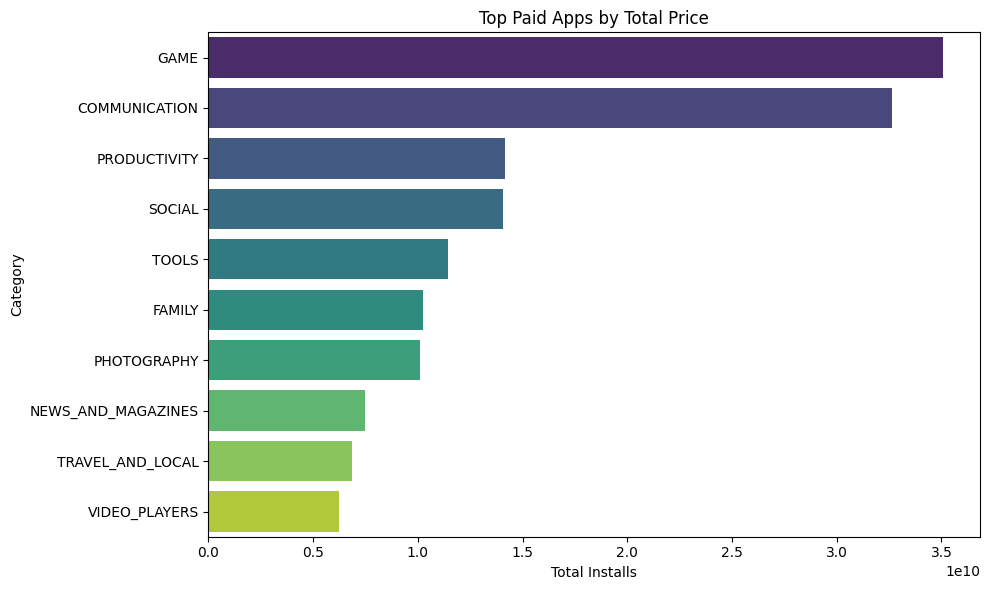

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting the PySpark DataFrame to a Pandas DataFrame for visualization
category_distribution_pd = category_distribution.toPandas()

# Create a bar plot of the top apps by total reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Installs', y='Category', data=category_distribution_pd, palette='viridis')

# Set plot labels and title
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.title('Top Paid Apps by Total Price')

# Show the plot
plt.tight_layout()
plt.show()

In [139]:
# Remove non-numeric characters from 'Installs' and 'Price', convert them to numeric
df = df.withColumn("Installs", regexp_replace(col("Installs"), "[^0-9]", "").cast("int")) \
       .withColumn("Price", regexp_replace(col("Price"), "[$]", "").cast("float"))

# Filter for paid apps only
paid_apps = df.filter(col("Type") == "Paid")

# Group by 'Apps', calculate total price, and order by descending total price
result = paid_apps.groupBy("App") \
    .agg(sum("Price").alias("Total_Price")) \
    .orderBy(col("Total_Price").desc())\
    .limit(10)

# Show the results
result.show()

+--------------------+----------------+
|                 App|     Total_Price|
+--------------------+----------------+
|I'm Rich - Trump ...|           400.0|
|I am rich (Most e...|399.989990234375|
|           I am rich|399.989990234375|
|   I Am Rich Premium|399.989990234375|
|  I am rich(premium)|399.989990234375|
|      I am Rich Plus|399.989990234375|
|           I am Rich|399.989990234375|
|  I AM RICH PRO PLUS|399.989990234375|
|          I am Rich!|399.989990234375|
|most expensive ap...|399.989990234375|
+--------------------+----------------+



C:\Users\S564560\AppData\Local\Temp\ipykernel_10052\3281147476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Price', y='App', data=result_pd, palette='viridis')


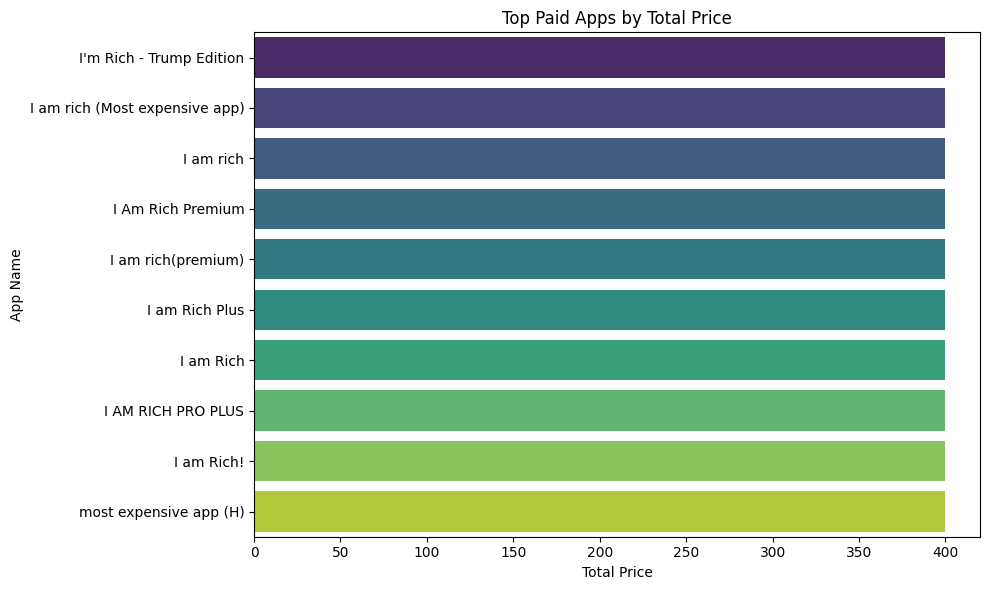

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting the PySpark DataFrame to a Pandas DataFrame for visualization
result_pd = result.toPandas()

# Create a bar plot of the top apps by total reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Price', y='App', data=result_pd, palette='viridis')

# Set plot labels and title
plt.xlabel('Total Price')
plt.ylabel('App Name')
plt.title('Top Paid Apps by Total Price')

# Show the plot
plt.tight_layout()
plt.show()



In [5]:
# Filter for paid apps only
df = df.filter(col("Rating").isNotNull() & (col("Rating") != "NaN"))
paid_apps = df.filter(col("Type") == "Paid")
# Group by 'App' and calculate average rating
top_rated_paid_apps = paid_apps.groupBy("App") \
    .agg(sum("Rating").alias("Total_Rating")) \
    .orderBy(col("Total_Rating").desc())\
    .limit(10)

# Show the top rated paid apps
top_rated_paid_apps.show(10)



+--------------------+------------------+
|                 App|      Total_Rating|
+--------------------+------------------+
|Human Anatomy Atl...|              13.5|
| Facetune - For Free|13.200000000000001|
|Dr. Panda & Toto'...|13.200000000000001|
|Tiny Scanner Pro:...|               9.6|
|Journal Club: Med...|               9.6|
|Hospitalist Handbook|               9.6|
|     Toca Life: City|               9.4|
|TurboScan: scan d...|               9.4|
|Fuzzy Numbers: Pr...|               9.4|
|Medical ID - In C...|               9.2|
+--------------------+------------------+



C:\Users\S564560\AppData\Local\Temp\ipykernel_22560\189026446.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Rating', y='App', data=top_rated_paid_apps_pd, palette='viridis')


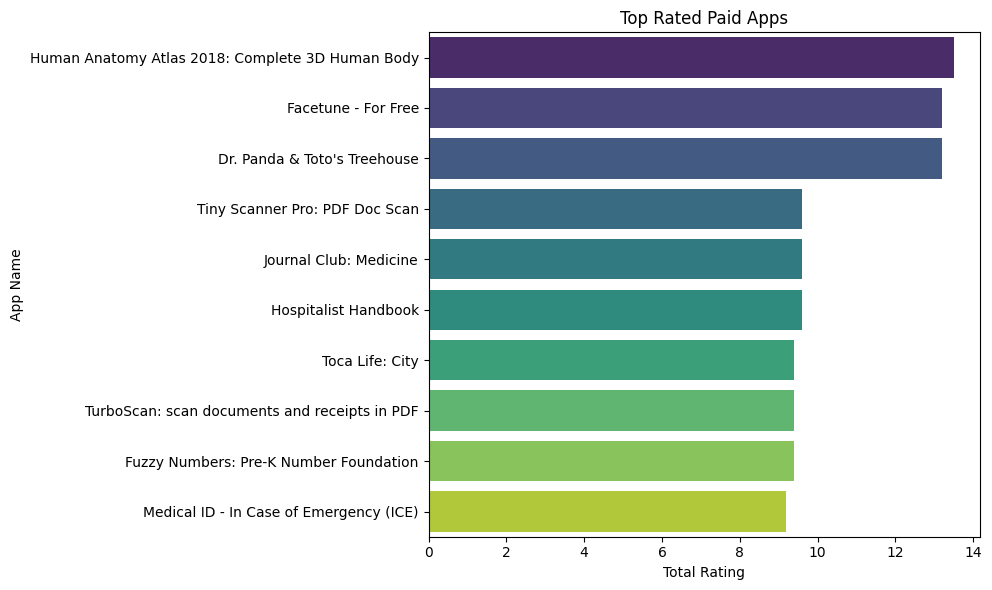

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting the PySpark DataFrame to a Pandas DataFrame for visualization
top_rated_paid_apps_pd = top_rated_paid_apps.toPandas()

# Create a bar plot of the top-rated paid apps
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Rating', y='App', data=top_rated_paid_apps_pd, palette='viridis')

# Set plot labels and title
plt.xlabel('Total Rating')
plt.ylabel('App Name')
plt.title('Top Rated Paid Apps')

# Show the plot
plt.tight_layout()
plt.show()


In [7]:
# Clean and preprocess the 'Rating' column (remove nulls or invalid ratings)
df = df.filter(col("Rating").isNotNull() & (col("Rating") != "NaN"))

# Group by category and calculate the average rating
result = df.groupBy("Category").agg(avg("Rating").alias("Average_Rating"))

# Sort the categories by average rating in descending order
result = result.orderBy(col("Average_Rating").desc())

# Show the top categories with highest average ratings
result.show()

+-------------------+------------------+
|           Category|    Average_Rating|
+-------------------+------------------+
|                1.9|              19.0|
|             EVENTS| 4.435555555555557|
|          EDUCATION| 4.389032258064517|
|     ART_AND_DESIGN| 4.358064516129031|
|BOOKS_AND_REFERENCE| 4.346067415730338|
|    PERSONALIZATION| 4.335987261146501|
|          PARENTING| 4.300000000000001|
|               GAME|4.2863263445761195|
|             BEAUTY| 4.278571428571428|
| HEALTH_AND_FITNESS|4.2773648648648654|
|           SHOPPING| 4.259663865546221|
|             SOCIAL| 4.255598455598457|
|            WEATHER| 4.243999999999999|
|             SPORTS| 4.223510971786835|
|       PRODUCTIVITY| 4.211396011396012|
|     HOUSE_AND_HOME| 4.197368421052633|
|             FAMILY| 4.192272467086437|
|        PHOTOGRAPHY| 4.192113564668767|
|  AUTO_AND_VEHICLES|  4.19041095890411|
|            MEDICAL|  4.18914285714286|
+-------------------+------------------+
only showing top

C:\Users\S564560\AppData\Local\Temp\ipykernel_22560\3222758082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Rating', y='Category', data=result_pd, palette='coolwarm')


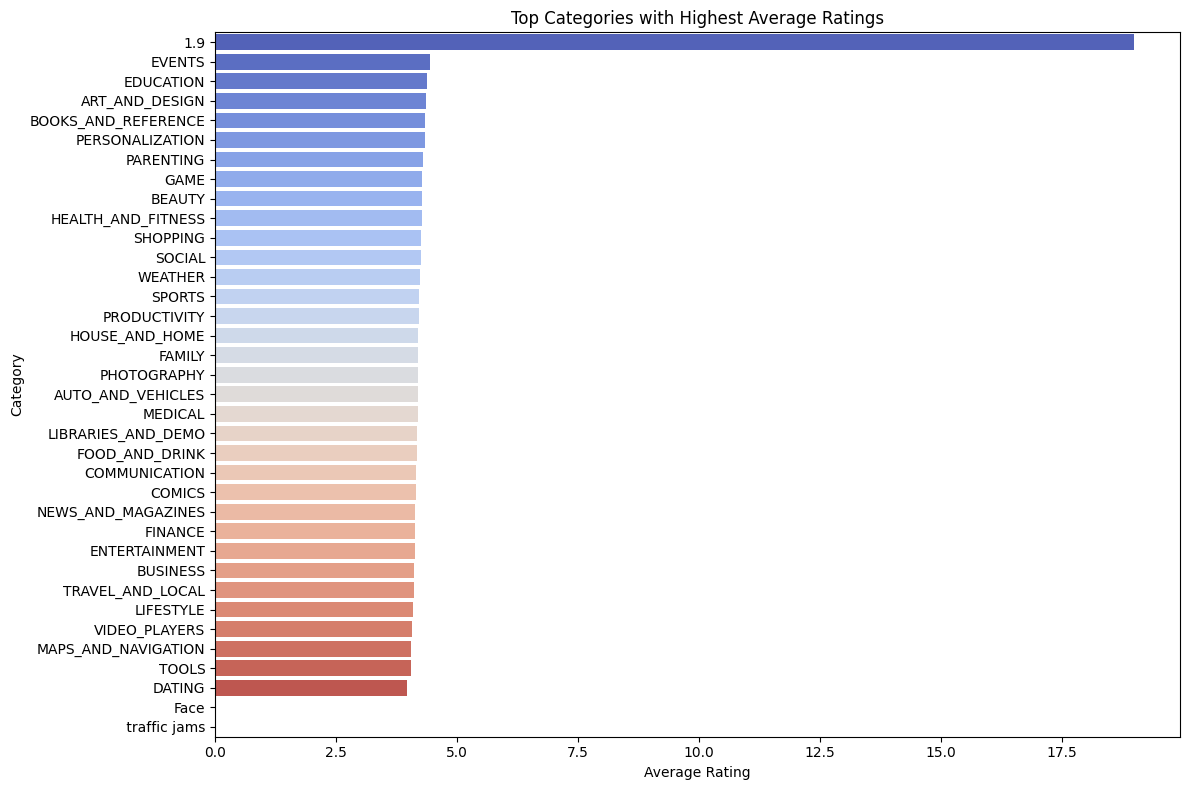

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting the PySpark DataFrame to a Pandas DataFrame for visualization
result_pd = result.toPandas()

# Create a bar plot of the average ratings for each category
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_Rating', y='Category', data=result_pd, palette='coolwarm')

# Set plot labels and title
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Top Categories with Highest Average Ratings')

# Show the plot
plt.tight_layout()
plt.show()
